In [40]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import tensorflow.keras
import math as m

In [2]:
nihss_gen_df = pd.read_csv('/home/brugha/Desktop/Project/NIHSSdata/NIHSSgen.csv',header=4)
try:
    nihss_gen_df.drop(columns=['code','Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3','Unnamed: 5'],inplace=True)
except:
    pass
nihss_gen_df.dropna(axis=0,thresh=0.2, inplace=True)
nihss_gen_df.dropna(axis=1,thresh=0.2, inplace=True)
# translate to english from polish
# K is female, M is Male
for i in range(len(nihss_gen_df['sex'])):
    if nihss_gen_df['sex'].iloc[i] == 'K':
        nihss_gen_df['sex'].iloc[i] = 'F'

/tmp/ipykernel_17196/3455598996.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihss_gen_df['sex'].iloc[i] = 'F'


In [3]:
nihss_gen_df['sex'] = pd.factorize(nihss_gen_df['sex'])[0]
nihss_gen_df['strokehemorhage'] = pd.factorize(nihss_gen_df['strokehemorhage'])[0]
nihss_gen_df['anterior/posterior'] = pd.factorize(nihss_gen_df['anterior/posterior'])[0]
nihss_gen_df['storke typ'] = pd.factorize(nihss_gen_df['storke typ'])[0]

In [4]:
nihss_gen_df.iloc[:,0:]

,NIHSS 1 rater,GCS,BI,MRS,BI 90,MRS 90,age,sex,strokehemorhage,anterior/posterior,storke typ,hypertension,diabetes,smoking,obesity,heart failure,hyperlipidemia,alcohol abuse,AF
2,1.0,15.0,90.0,1.0,100.0,0.0,71.0,0,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,15.0,95.0,1.0,100.0,0.0,49.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,15.0,90.0,1.0,100.0,0.0,70.0,1,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8.0,15.0,60.0,3.0,70.0,2.0,83.0,1,0,0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,6.0,15.0,100.0,1.0,100.0,0.0,54.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1.0,15.0,95.0,1.0,100.0,0.0,63.0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
223,8.0,15.0,60.0,4.0,70.0,3.0,40.0,0,0,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
224,20.0,13.0,30.0,5.0,40.0,5.0,78.0,0,0,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
225,4.0,15.0,90.0,3.0,95.0,2.0,88.0,1,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


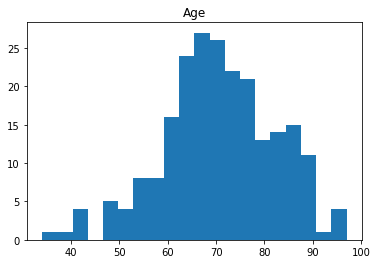

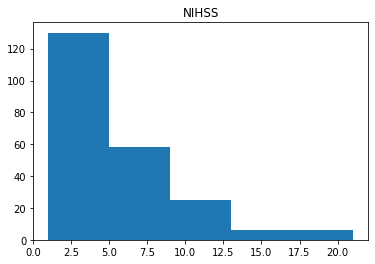

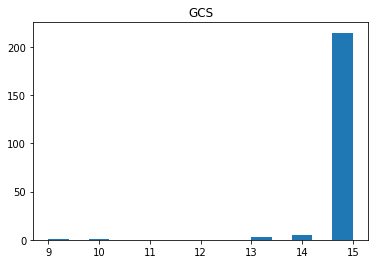

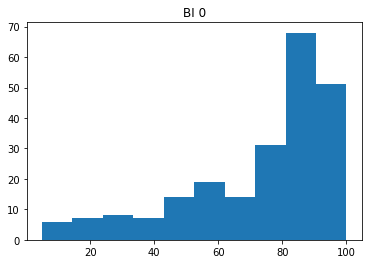

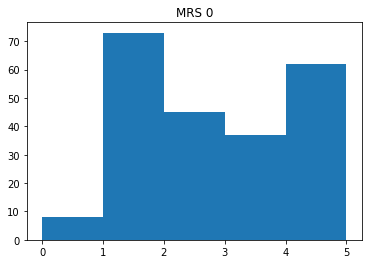

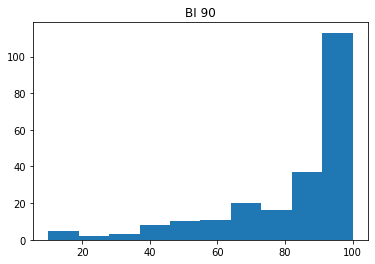

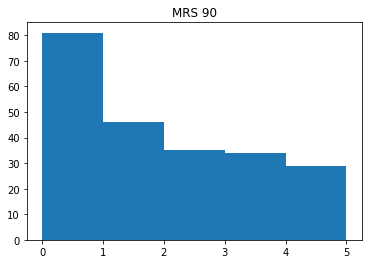

In [5]:
plt.title('Age')
plt.hist(nihss_gen_df['age'], bins=20)
plt.show()
plt.title('NIHSS')
plt.hist(nihss_gen_df['NIHSS  1 rater'], bins=5)
plt.show()
plt.title('GCS')
plt.hist(nihss_gen_df['GCS  '], bins=15)
plt.show()
plt.title('BI 0')
plt.hist(nihss_gen_df['BI '], bins=10)
plt.show()
plt.title('MRS 0')
plt.hist(nihss_gen_df['MRS '], bins=5)
plt.show()
plt.title('BI 90')
plt.hist(nihss_gen_df['BI 90'], bins=10)
plt.show()
plt.title('MRS 90')
plt.hist(nihss_gen_df['MRS 90'], bins=5)
plt.show()

In [6]:
columns = nihss_gen_df.columns
target = nihss_gen_df.iloc[:,4:6]
riskFactors = nihss_gen_df.iloc[:,0:]
riskFactors.drop(columns=['BI 90', 'MRS 90'], inplace = True)
nihss_gen_df.drop(columns=[i for i in columns[0:6]], inplace=True)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nihss_gen_df = scaler.fit_transform(nihss_gen_df)
riskFactors = scaler.fit_transform(riskFactors)

In [8]:
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(riskFactors, 
                                                                                  target,
                                                                                  test_size=0.1,
                                                                                  shuffle=True)

In [9]:
try:
    n_inputs, n_outputs = train_data.shape[1], train_label.shape[1]
except:
    try:
        n_inputs = train_data.shape[1]
        n_outputs = 1
    except:
        n_inputs = 1
        n_outputs = 1

In [10]:
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [11]:
seed = 100
tf.random.set_seed(
    seed
)

In [12]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(n_inputs,)),
    tf.keras.layers.Dense(64, activation='linear'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_outputs, activation='linear')
])

2022-08-22 10:45:10.316260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 10:45:11.121231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-08-22 10:45:11.121246: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-08-22 10:45:11.125826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [13]:
model.compile(optimizer='adam',
              loss ='mean_absolute_error',
              metrics=['acc'])

In [14]:
epoch = 5000
history = model.fit(
    train_data, 
    train_label, 
    epochs=epoch, 
    validation_split=0.2,
    verbose=0, batch_size=512
)

In [15]:
test_loss, test_acc = model.evaluate(test_data,test_label)

1/1 [==============================] - 0s 10ms/step - loss: 1.3389 - acc: 1.0000


In [16]:
print('Accuracy: {}%'.format(np.round(test_acc*100),2),
     '\nLoss: {}'.format(test_loss))

Accuracy: 100.0% 
Loss: 1.3388959169387817


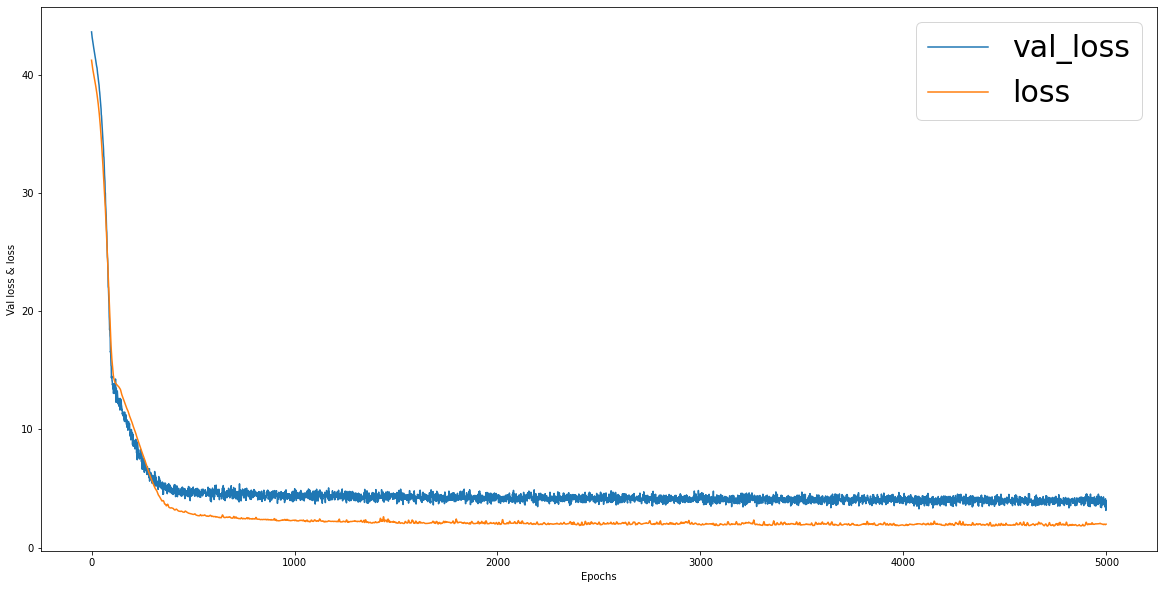

In [17]:
plt.figure(figsize=(20,10))
plt.plot(list(range(epoch)), history.history['loss'], history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Val loss & loss')
plt.legend(('val_loss', 'loss'), prop={'size':30})
plt.savefig('NIHSSdata/val_lossVSloss.jpg')

In [60]:
list_of_predictions = []
for i in range(len(test_data)):
    a = test_data[i]
    a = np.expand_dims(a, 0)
    b = np.round(model.predict(a, verbose=0),1)
    list_of_predictions.append(b[0].tolist())
preds = model.predict(test_data,verbose=0)

In [83]:
def round_to_multiple(number, multiple):
    if number is list:
        output = []
        assert len(number) == len(multiple), 'A multiple needs to be given for each number'
        for no, mul in number, multiple:
            output.append(mul * np.round(no / mul))
        return output
    else:
        return multiple * np.round(number / multiple)

/tmp/ipykernel_17196/2701294525.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


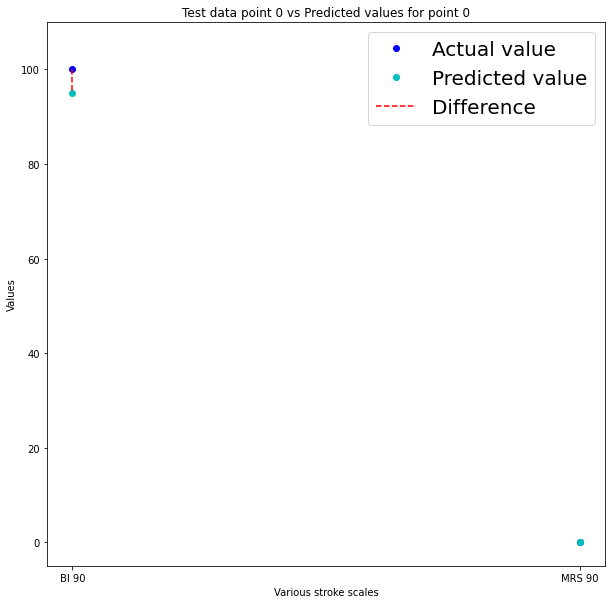

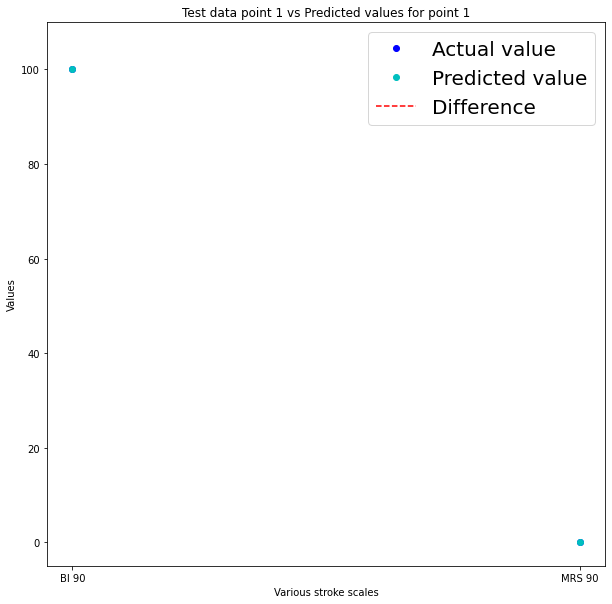

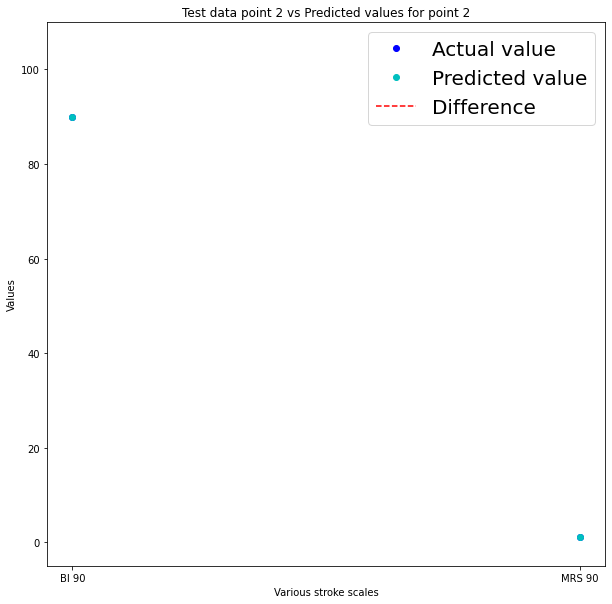

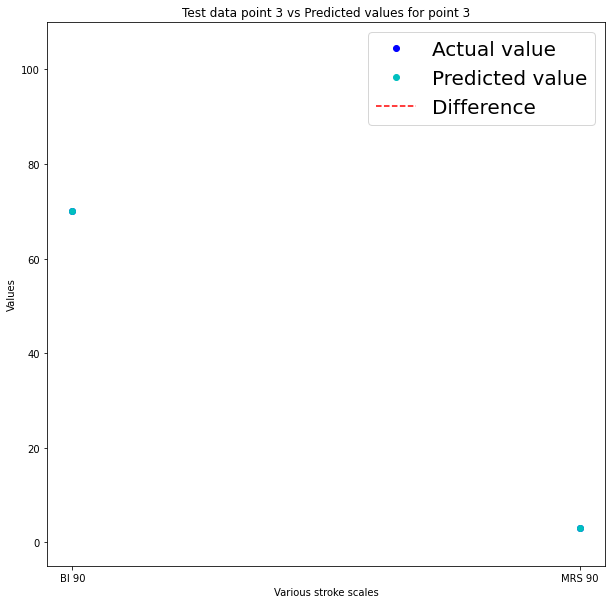

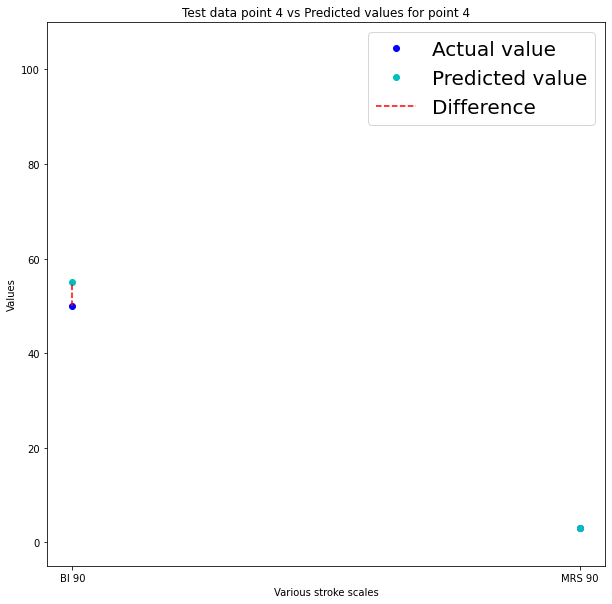

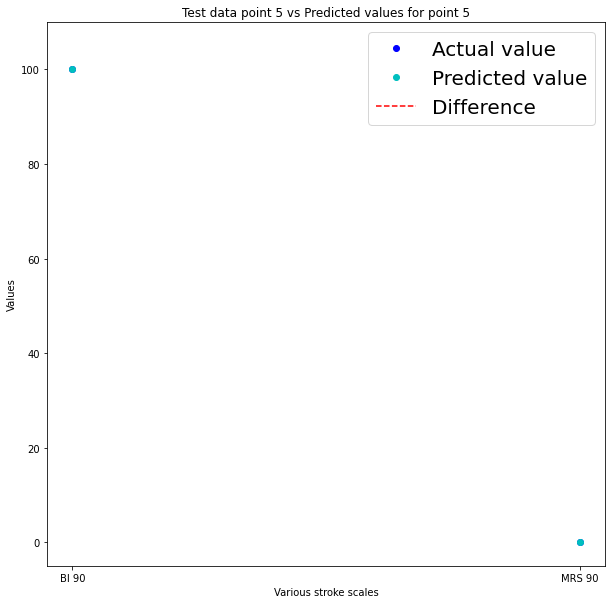

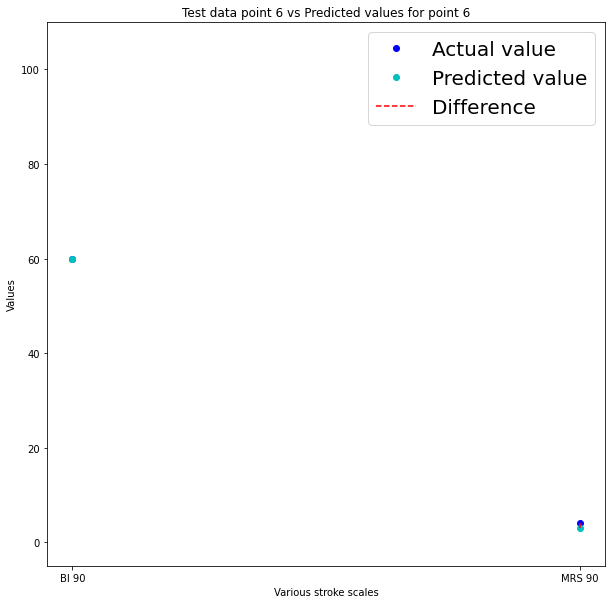

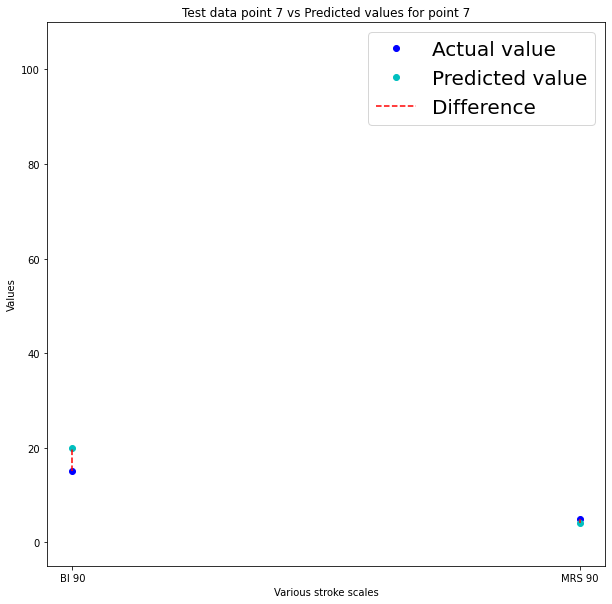

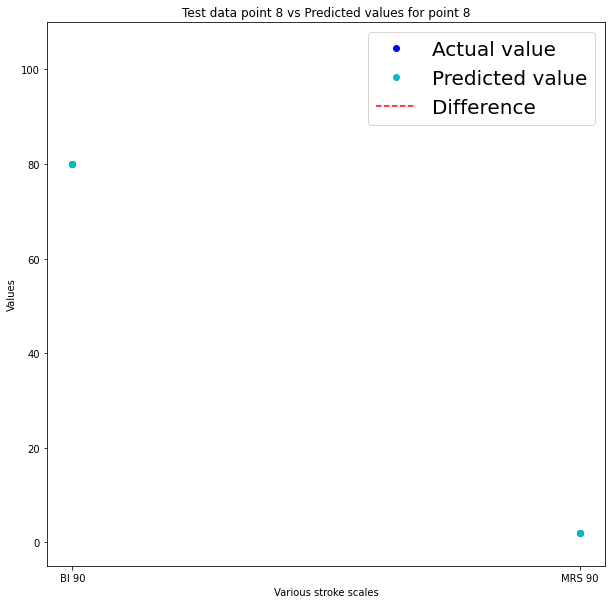

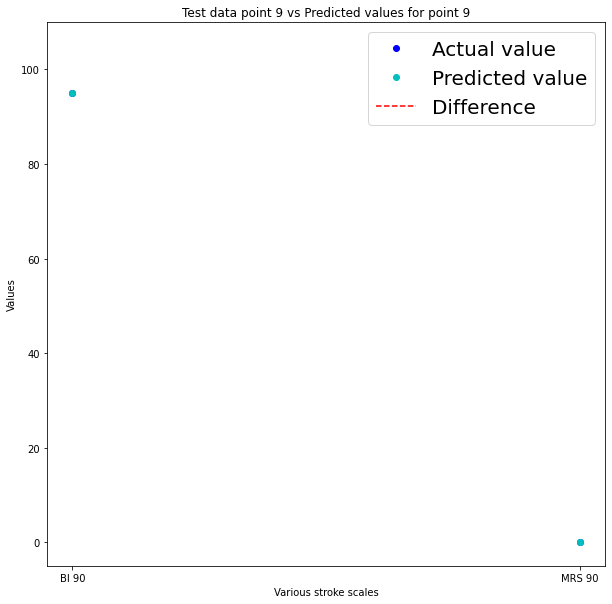

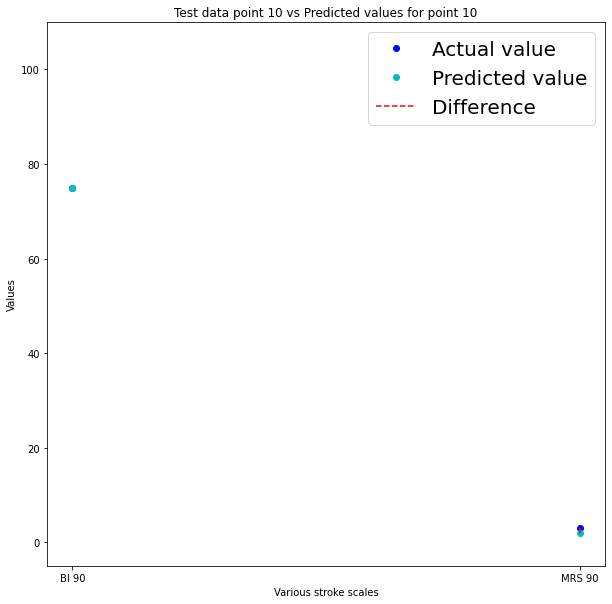

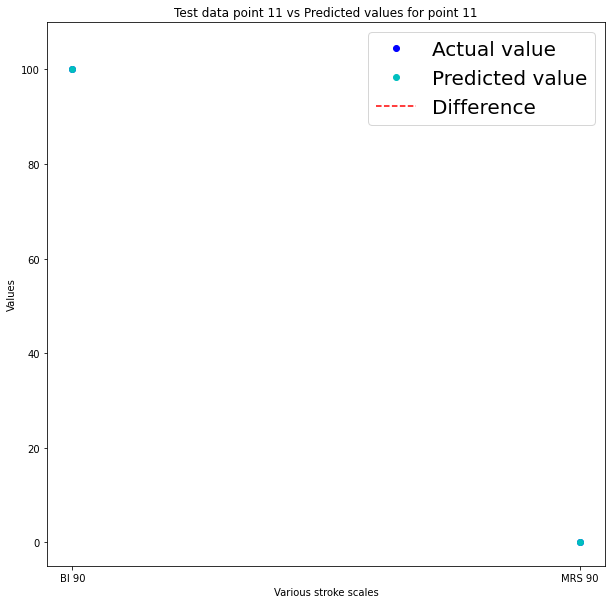

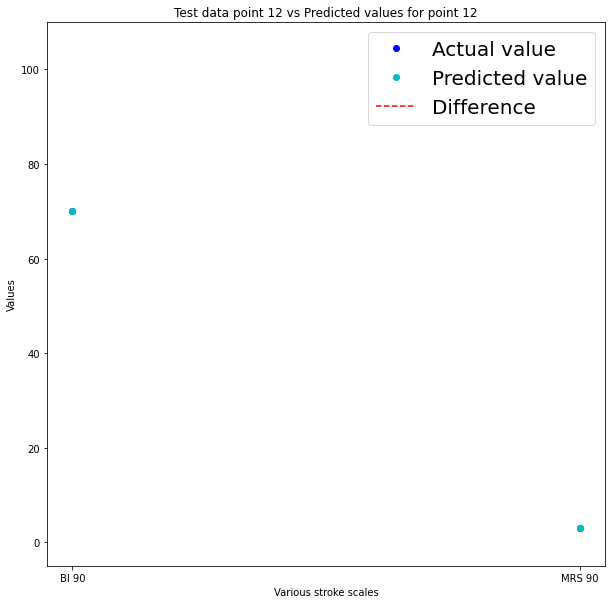

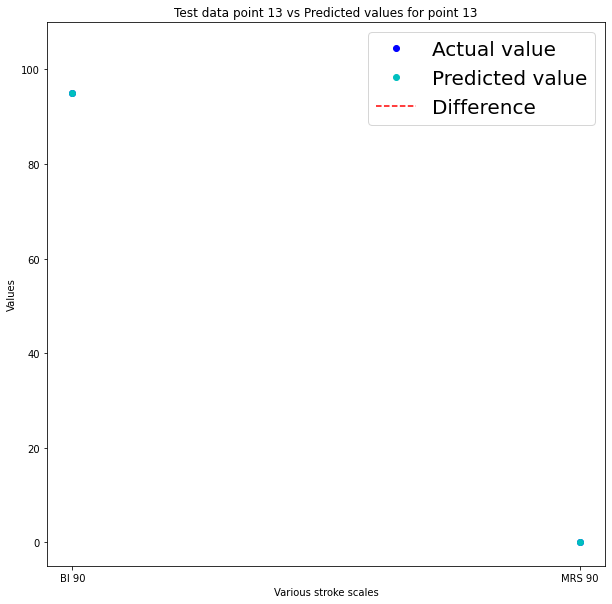

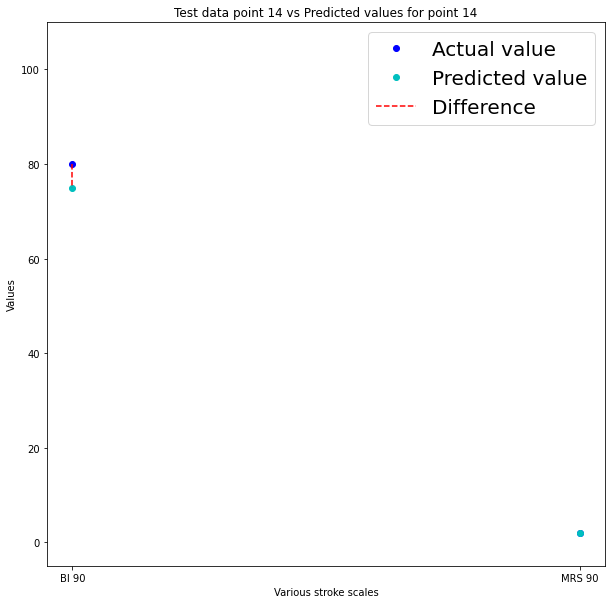

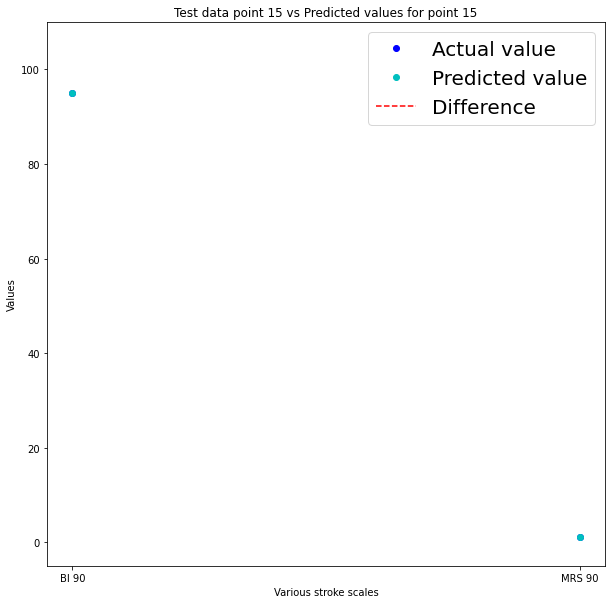

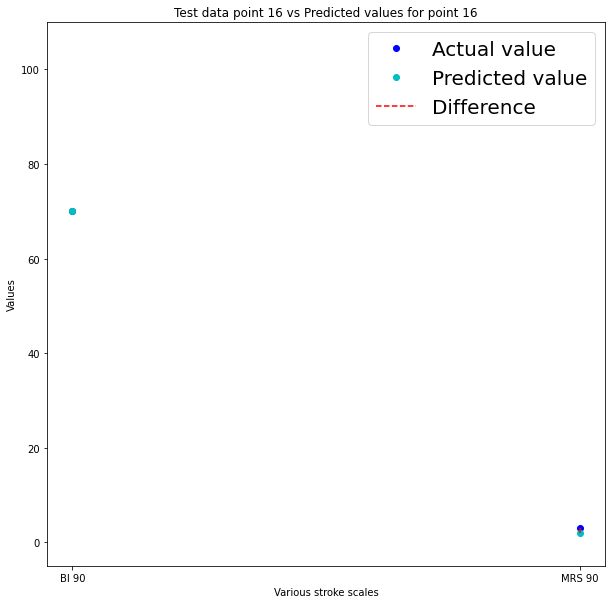

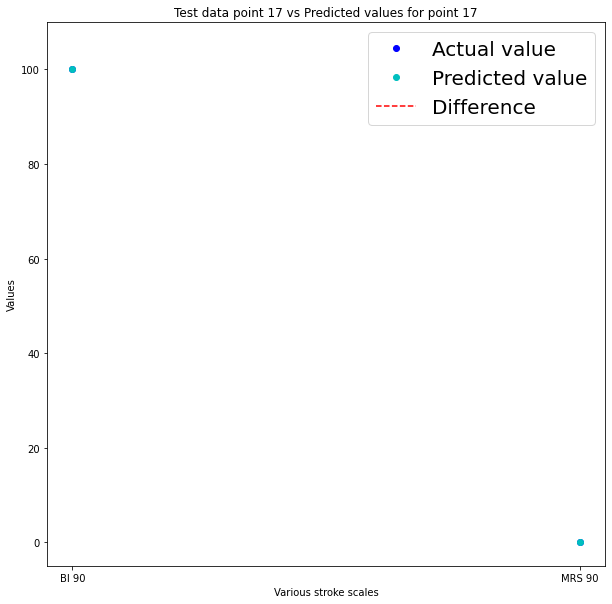

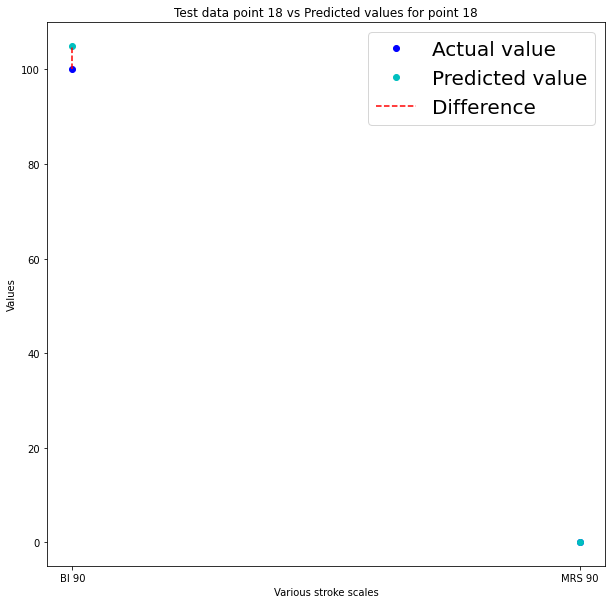

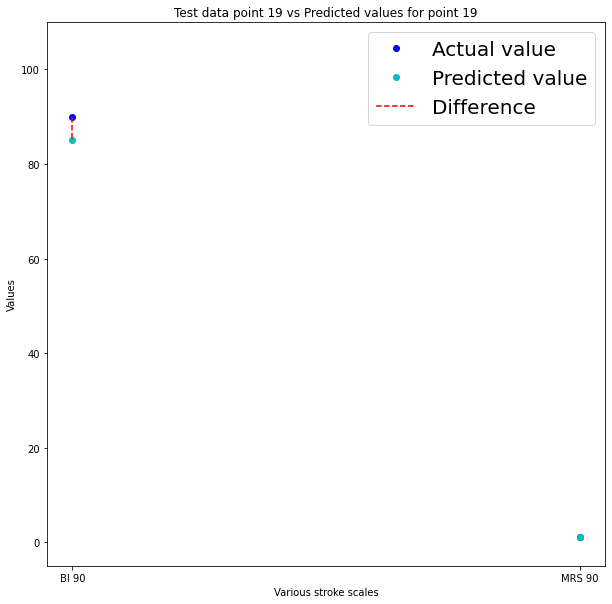

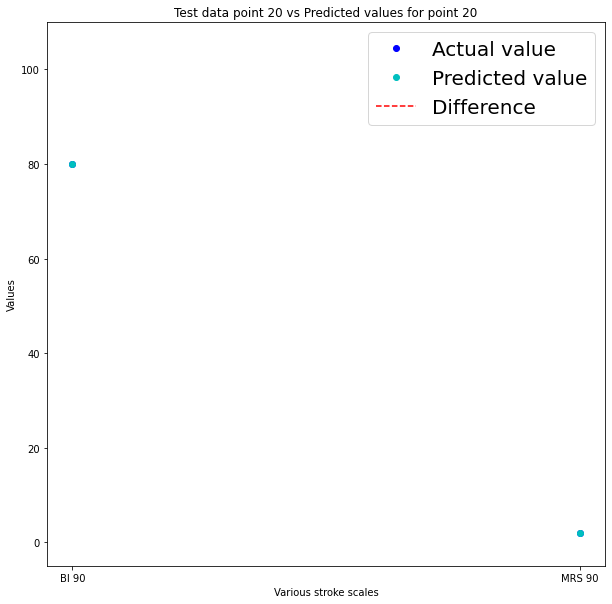

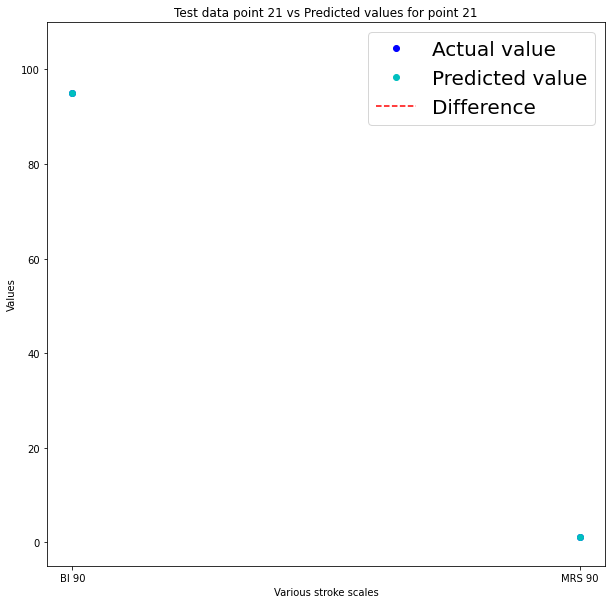

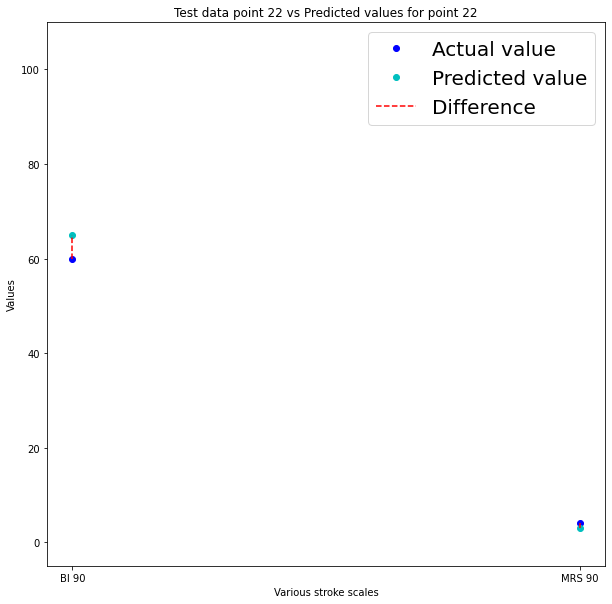

In [63]:
linspace = list(target.columns)

for i in range(0 ,len(test_label)):
    plt.figure(figsize=(10,10))
    plt.ylim(-5,110)
    plt.plot(linspace, test_label[i],'bo', linestyle='None')
    plt.plot(linspace, round_to_multiple(preds[i],[5,1]),'co', linestyle='None')
    plt.vlines(linspace, test_label[i], round_to_multiple(preds[i],[5,1]),'r' ,linestyle = '--')
    i = str(i)
    plt.title(f'Test data point {i} vs Predicted values for point {i}')
    plt.xlabel('Various stroke scales')
    plt.ylabel('Values')
    plt.legend(('Actual value', 'Predicted value', 'Difference'), prop={'size':20})
    plt.savefig('NIHSSdata/Actual Value vs Predicted value case' + str(i) +'.jpg')

In [20]:
model.save('saved_model/NIHSS_model')

INFO:tensorflow:Assets written to: saved_model/NIHSS_model/assets
